#  Democracy of the Trees: How Ensemble Methods Reduce Variance in Decision Forests

## Eric Hullander

<figure>
          <img src = 'https://poetkatehutchinson.files.wordpress.com/2012/09/treebeard1.jpg'              style="width:300px;height:300px" align = left>
</figure>

#### “Side? I am on nobody's side, because nobody is on my side, little orc.”  - Treebeard

Given a dataset and a target variable, there are many methods for finding a mapping (model) between the dataset and the target variable, and in the discipline of machine learning this process is called ‘supervised learning’.  There are two types of supervised learning, regression when our target is numerical, and classification when our target variable is categorical. Among these, there are many types of learners and each learner has its own set of strengths and weaknesses. Some attributes we would like our learner to have are: 

#### Qualities of a good Learner

-	Interpretability: Why did the model choose this result?  
-	Accuracy:   
    -	Are the predictions correct?   
    -	Do the results generalize to new data?  
-	Efficiency:   
    -	How long does it take to train this model?  
    -	Does it require lots of data  
-	Dimensionality:   
    -	Robust to Irrelevancy: Do we have to perform feature selection or reduce dimensionality to obtain a good model?  
    -	Robust to Collinearity: Will collinear variables compromise accuracy or interpretability?  
-	Robust to Scaling:  Will scaling or transforming the data affect the results?  

Unfortunately, we cannot always get everything we want, so when choosing a learner we must ask what kind of data we have and what questions we are trying to answer.

#### The decision trees have many of these qualities.  [1]

- Interpretability: We can see where splits are made 
- Accuracy: Decision trees are accurate on average (low bias), but highly dependent on the sample (high variance).  So they cannot be trusted on an individual basis
- Efficiency:  Greedy algorithm is O(C n log n) where C are number of features and n are number of samples.
- Robust to Dimensionality:  Dimensionality does not compromise accuracy
- Robust to Irrelevancy: Trees perform automatic feature selection based on GINI impurity or information gain.  Irrelevant features just aren’t used
- Robust to Collinearity: If two variables are collinear, the can use one or the other making one of the two unimportant to the model when they are equally important
- Robust to Scaling:  Scaling and many transformations e.g. log(x) would not affect where the tree splits if using GINI impurity or information gain.

<img src = "http://i.stack.imgur.com/r7QFy.png" style="width:300px;height:300px" align = left>

Look at the upper right target in Fig. 1 and imagine these points were obtained by looking at the predictions, $X_i$ of *n* different trees. Let's assume that these trees are i.i.d, i.e. *independant and identically distributed* and have a mean accuracy *p*.  This accuracy may be high (low bias), but the spread of the predictions appear to still be wide (high variance). We may calculate this variance by asking about what the probability mass function (pmf) of this process looks like.  Since we constrained the trees to be independent, we can easily calculate the probability of combinations of successes and failures.  For example, the probability that all *n* trees are correct is $$p^n$$ while the probability that all *n* trees are incorrect is  $$(1-p)^n$$ in general,the probability of *k* trees being correct is $${n \choose k}p^k (1-p)^{(n-k)}$$  This is a binomial distribution.  

Not being satisfied with a bunch of weak predictors, we ask what happens if we ensemble our trees by simply averaging the results?  $$Y = \sum\limits_{i=0}^{n}\frac{1}{n}X_i$$  We know on average the accuracy of *Y* is *p*, by definition, but what if we repeated this averaging process, what would happen to the variance?  We need to know the pmf of Y.  So the question becomes "What is the probability that our predictor has an accuracy of $p'$?"  Rather than "what is the proabibilty *k* out of *n* trees was correct?"  This effectively scales and sharpens the binomial distribution around the mean.  Below we plot these distributions and then scale them by the maximum value.  As can be seen, as the number of estimators that are averaged together increases, the sharper the distribution around the mean.  Our ensemble has less variance than the individual trees themselves


In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

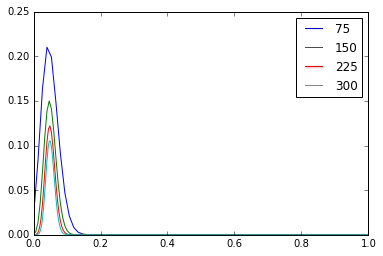

In [74]:
from scipy.misc import comb
for n in xrange(1,5):
    x = []
    y = []
    p = .05
    tot = 0
    #N is number of trees
    N = 75*n
    #k is number of correct trees
    for k in xrange(0,N+1):
        x.append(1.0*k/N)
        y.append(comb(N,k)*(p**k)*((1-p)**(N-k)))
    #y = y/np.max(y)
    plt.plot(x,y, label = N)
    plt.legend()


 
Theorem. Suppose $$X_1, X_2, ... , X_n$$ are n independent random variables with means $$\mu_1,\mu_2,⋯,\mu_n $$and variances $$\sigma_1,\sigma_2,⋯,\sigma_n $$. 

Then, the mean and variance of the linear combination $$Y = \sum\limits_{i=1}^{n} a_i X_i$$, where a1, a2, ... , an are real constants are:

$$\mu_Y = \sum\limits_{i=1}^{n} a_i \mu_i$$and:

$$\sigma^2_Y = \sum\limits_{i=1}^{n} a^2_i \sigma^2_i$$

Substituting $a_i= \frac{1}{n}$ and $\sigma_i = \sigma_X$, because iid, gives

$$\sigma^2_Y = \frac{\sigma^2_X}{n}$$

Alternatively we can calculate the variance outright



$$\sigma^2_Y = var(Y) = \sum\limits_{k=0}^{n}{n \choose k}p^k (1-p)^{(n-k)} (\frac{k}{n} - p)^2$$

Below we plot variance on the y axis and number of trees on the x axis to show that these methods produce the same results

In [67]:
'''
[wins and losses example], 
number of wins, 
number of combinations, 
probability of number of wins, 
distance from mean'''
result = []

for N in range(1,50):
    tot = 0
    for k in range(N + 1):
        x = np.hstack((np.zeros(N-k), np.ones(k)))
        #print x, k, comb(N,k), ((p**k)*((1-p)**(N-k))), (1.0*k/N - p)
        tot += (comb(N,k)*((p**k)*((1-p)**(N-k))))*(1.0*k/N - p)**2
    result.append(tot)

In [68]:
# above equation, ai = 1/n, sigma is p*(1-p).  All factor out of summation.  Summation reduces to n
#becomes p*(1-p)/n
result2 = 1.0*p*(1-p)/np.array(range(1,50))

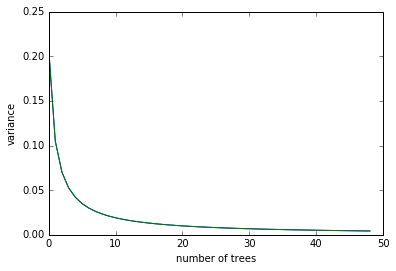

In [70]:
plt.plot(result)
plt.plot(result2)
plt.xlabel('number of trees')
plt.ylabel('variance')

If this sounds like the central limit theorem, it is no coincidence.  In fact it can be shown that as N grows large, the binomial distribution converges to the normal distribution.  